In [10]:
import numpy as np
from matplotlib import pyplot as plt
import numpy 
import lane_detection
import lane_following
import cv2


In [4]:
cameraMatrix = numpy.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))

camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
#tags = at_detector.detect(img, True, camera_params, tag_size)
#tags[0].pose_t
#tags[0].pose_R

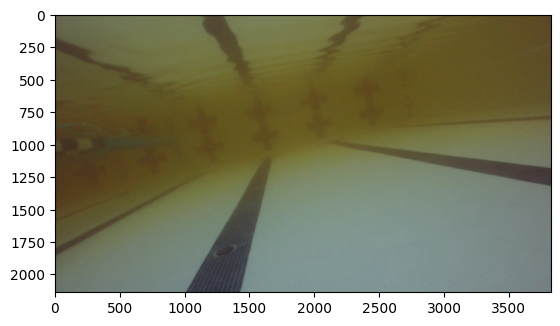

In [5]:
img = cv2.imread('test_image4.png')
type(img)
img.shape
resized = (cv2.resize(img, (1912, 1069)))
height = resized.shape[0]
width = resized.shape[1]
againResized = resized[int(height/2) : height, 0 : width]
justincase = np.copy(againResized)
image = np.copy(resized)
imageLanes = np.copy(resized)
plt.imshow(img)

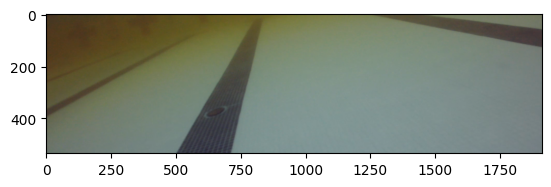

In [6]:
plt.imshow(againResized)


In [7]:
lines = lane_detection.detect_lines(againResized)


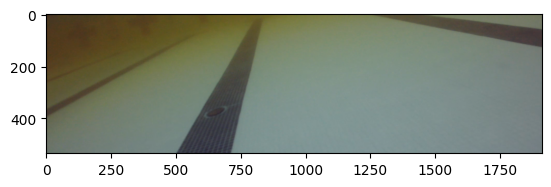

In [8]:
plt.imshow(lane_detection.draw_lines(againResized, lines))


In [9]:
lanes = lane_detection.detect_lanes(againResized, lines)
plt.imshow(lane_detection.draw_lanes(againResized, lanes))

TypeError: get_slopes_intercepts() missing 1 required positional argument: 'lines'

In [ ]:
def videoDetection(vid):
    output_video = cv2.VideoWriter('output_videoo.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, (1912, 535))
    # video.release() #Save video to disk.
    # total_frames = []
    # Capture frame-by-frame
    i = 1
    while True:
        ret, frame = vid.read()
        if ret:
            resized = (cv2.resize(frame, (1912, 1069)))
            againResized = resized[int(535/2) : 535, 0 : 1912]
        
            lines = lane_detection.detect_lines(againResized, 30, 100, 3, 229, 13)
            if lines is not None:
                lanes = lane_detection.detect_lanes(againResized, lines)
            else:
                lanes = []
            frame = lane_detection.draw_lanes(againResized, lanes)
            # total_frames.append(frame)
            output_video.write(frame)
        i+=1
        if i >= vid.get(cv2.CAP_PROP_FPS): break # NOTE TO CHECK THIS OVER BECAUSE I DUNNO IF ITS >= OR ==
    output_video.release()

In [11]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
videoDetection(vid)

TypeError: get_slopes_intercepts() missing 1 required positional argument: 'lines'